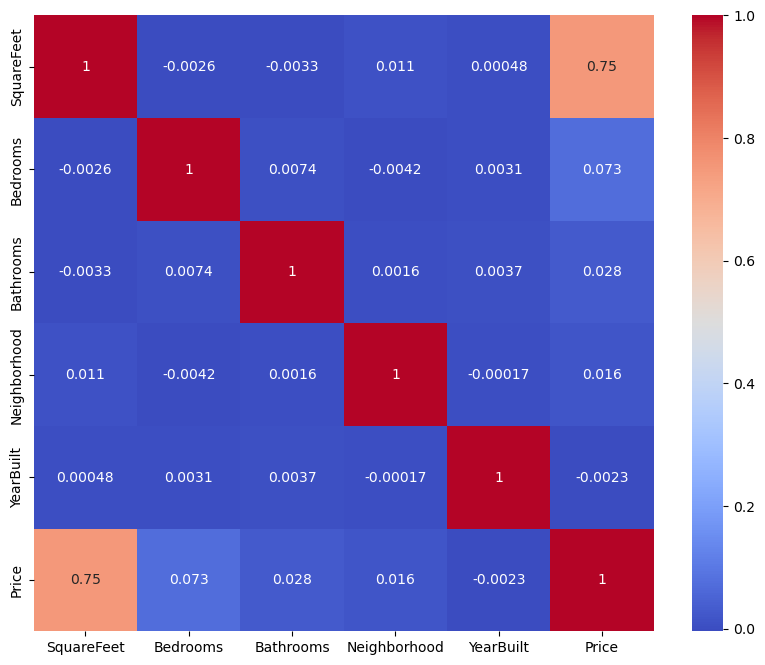

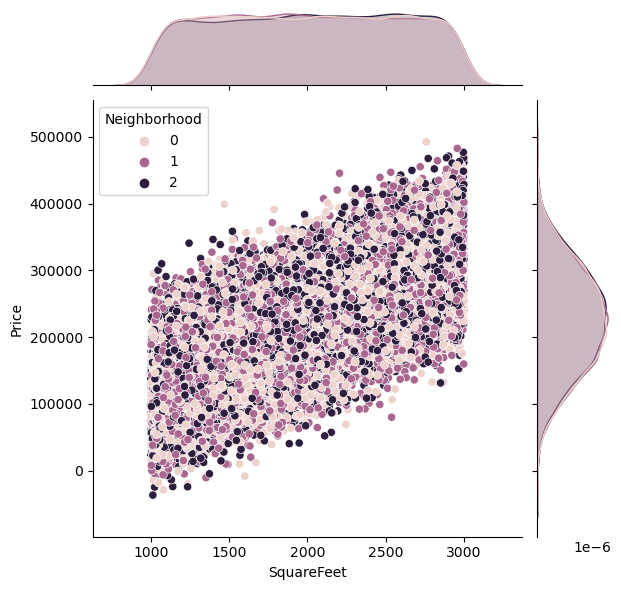

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('housing_price_dataset.csv')

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Neighborhood'] = label_encoder.fit_transform(data['Neighborhood'])

# Heatmap
heatmap_fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax)

# Joint plot
jointplot = sns.jointplot(data=data, x="SquareFeet", y="Price", hue="Neighborhood")

# Show the plots
plt.show()


3666088780.2307496


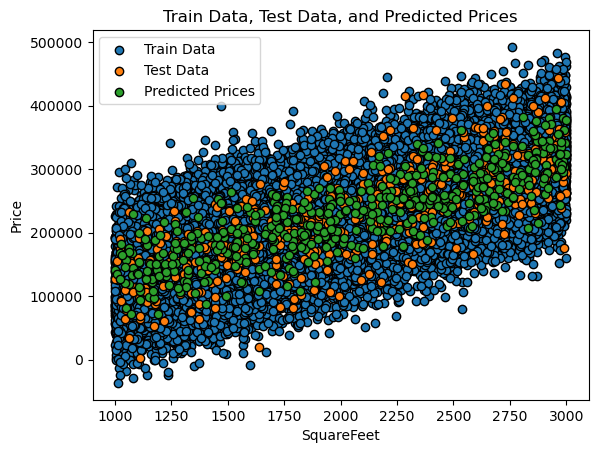

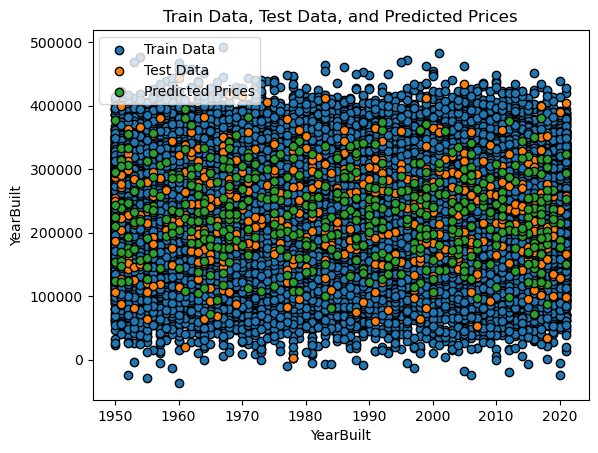

In [25]:
# Define the train_model function
def train_model(X_train, y_train, n_neighbors):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    return model

# Features and target
X = data.drop('Price', axis=1)
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Model selection
n_neighbors = 2
model = train_model(X_train, y_train, n_neighbors)

# Make predictions
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print(mse)

# Plot train data, test data, and predicted values
fig, ax = plt.subplots()
ax.scatter(X_train['SquareFeet'], y_train, label='Train Data', edgecolors=(0, 0, 0))
ax.scatter(X_test['SquareFeet'], y_test, label='Test Data', edgecolors=(0, 0, 0))
ax.scatter(X_test['SquareFeet'], predictions, label='Predicted Prices', edgecolors=(0, 0, 0))
ax.set_xlabel('SquareFeet')
ax.set_ylabel('Price')
ax.legend()
ax.set_title('Train Data, Test Data, and Predicted Prices')

# Show the plot
plt.show()


# Plot train data, test data, and predicted values
fig, ax = plt.subplots()
ax.scatter(X_train['YearBuilt'], y_train, label='Train Data', edgecolors=(0, 0, 0))
ax.scatter(X_test['YearBuilt'], y_test, label='Test Data', edgecolors=(0, 0, 0))
ax.scatter(X_test['YearBuilt'], predictions, label='Predicted Prices', edgecolors=(0, 0, 0))
ax.set_xlabel('YearBuilt')
ax.set_ylabel('YearBuilt')
ax.legend()
ax.set_title('Train Data, Test Data, and Predicted Prices')

# Show the plot
plt.show()